### This will be my own version of "California Housing" median price prediction 
##### I will Try to use different models and techniques 

In [2]:
# Core imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
Hdf = pd.read_csv("housing.csv") # housing data

# Exploration

###### Firstly we Had a problem with the Y labels "Median House Value", any house value was greater than 500k have been cut and set to 500k, that will cause or model to set prediction limit to 500k

<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

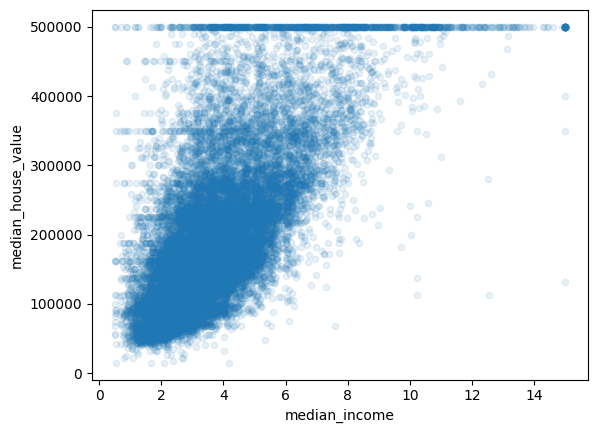

In [4]:
Hdf.plot(kind='scatter', x = 'median_income', y = 'median_house_value', alpha=0.1)

##### Now we should split our data to test and train sets, but we have to do the split in stratified manner covering all catagories of median income values to help our model in generalization.

In [5]:
# dividing median income values to catagories
Hdf['income_cat'] = pd.cut(Hdf['median_income'],bins=[0.,1.5,3.0,4.5,6.,np.inf], labels=[1,2,3,4,5])

In [6]:
Hdf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


<AxesSubplot: >

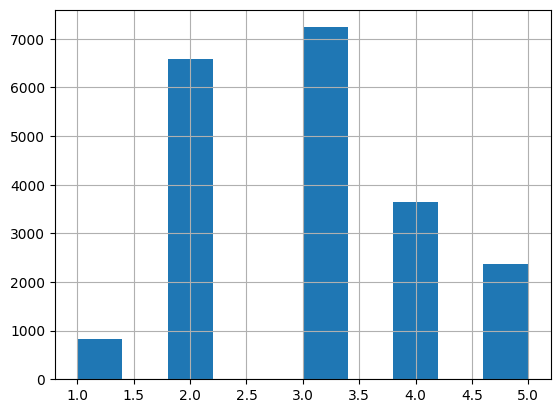

In [7]:
Hdf['income_cat'].hist()

In [8]:
# we will split the data in stratified manner 
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state = 42)

In [9]:
for train_index, test_index in split.split(Hdf, Hdf['income_cat']): # stratified split on income catagories
    start_train_set = Hdf.loc[train_index]
    start_test_set = Hdf.loc[test_index]

#### Now we have split our data in a way it's represents the population let's see how well we did

In [10]:
start_test_set['income_cat'].value_counts() / len(start_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [11]:
start_train_set['income_cat'].value_counts() / len(start_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [12]:
Hdf['income_cat'].value_counts() / len(Hdf)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

#### Now we can see that our test and train sets represent the whole data perfectly, let's drop the income category column

In [13]:
for set_ in (start_train_set, start_test_set):
    set_.drop("income_cat", axis = 1, inplace=True)
#creating a copy of the data set
Hdf = start_train_set.copy()

#### Let's copy the important data exploration from the book

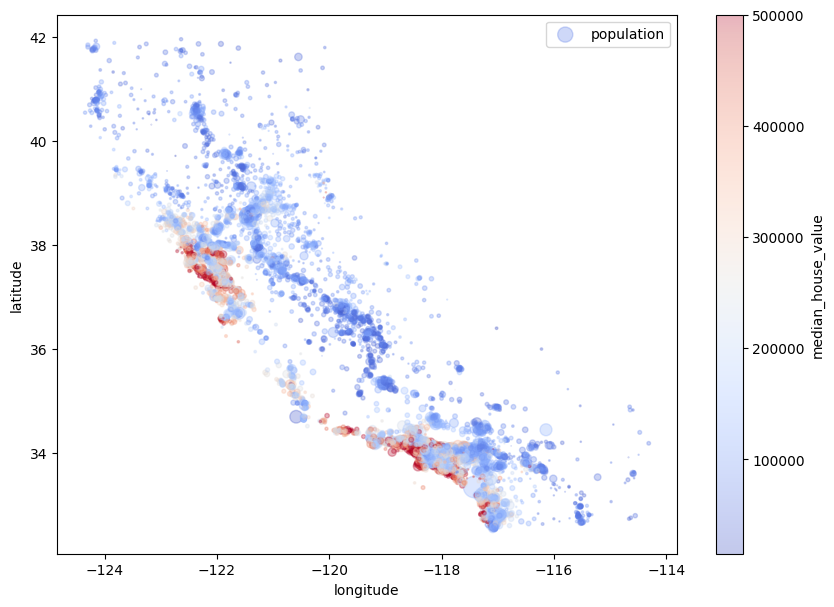

In [14]:
Hdf.plot(kind='scatter', x = 'longitude', y = 'latitude', alpha=.3, s = Hdf['population']/150, label='population', figsize=(10,7),
        c='median_house_value', cmap='coolwarm', colorbar=True)
plt.show()

In [15]:
corr_matrix = Hdf.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)
# we can see that median income have the strongest relation with the house price

C:\Users\karim\AppData\Local\Temp\ipykernel_23028\3018910162.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Hdf.corr()


median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

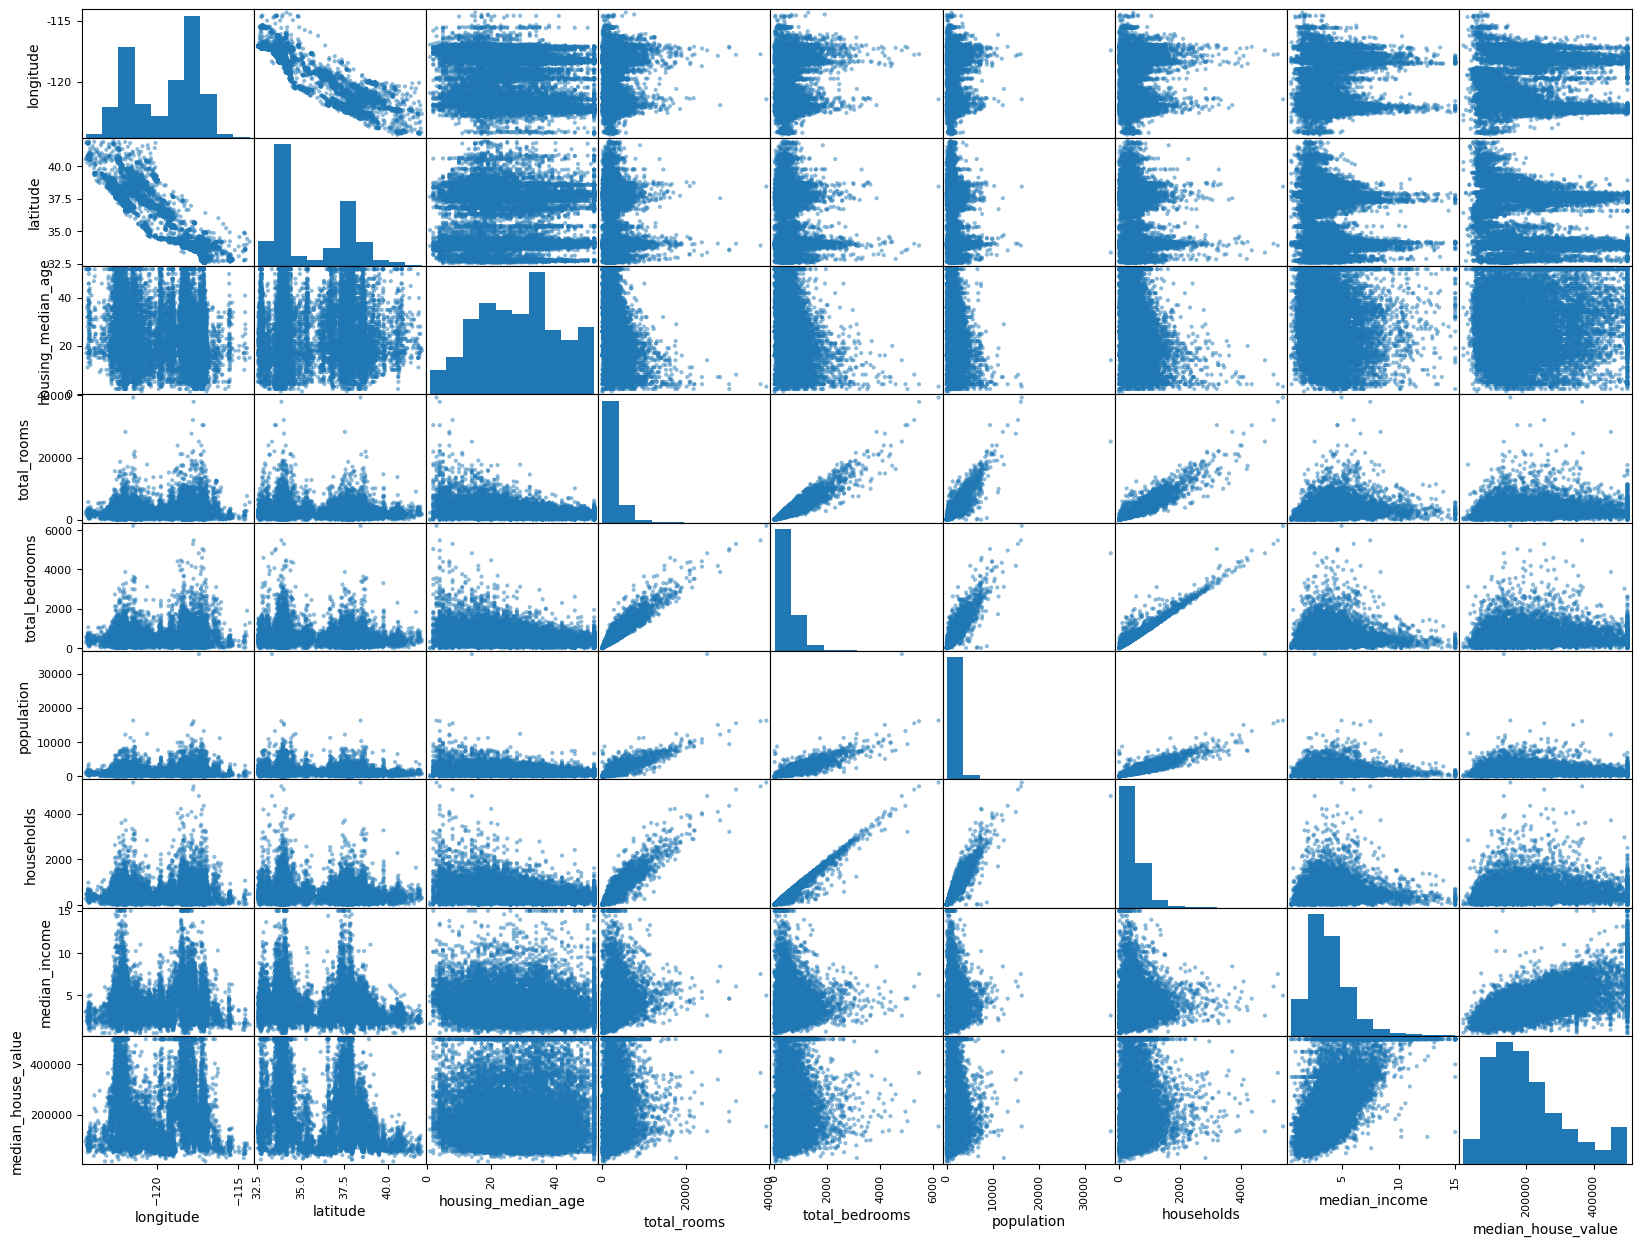

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(Hdf,figsize=(20,15))
plt.show()

#### It's obvious from the stat and the plot that house median income have the strongest relation with house value<br> let's start creating some features that may be useful

In [17]:
#creating some useful features 
Hdf['rooms_per_house'] = Hdf['total_rooms'] / Hdf['households']
Hdf['bedrooms_per_room']  = Hdf['total_bedrooms'] / Hdf['total_rooms']
Hdf['population_per_house'] = Hdf['population'] / Hdf['households']

In [18]:
Hdf['rooms_log'] = np.log2(Hdf['total_rooms'])**3 # that wast random feature i have created by luck
Hdf['Random'] = Hdf['housing_median_age'] * Hdf['households'] # I was thinking that if there is a lot of old houses in area then people love living in this area, price get higher

In [19]:
# see how our new features corelate with the price
corr_matrix = Hdf.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

C:\Users\karim\AppData\Local\Temp\ipykernel_23028\793539863.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = Hdf.corr()


median_house_value      1.000000
median_income           0.687151
rooms_log               0.166741
Random                  0.163401
rooms_per_house         0.146255
total_rooms             0.135140
housing_median_age      0.114146
households              0.064590
total_bedrooms          0.047781
population_per_house   -0.021991
population             -0.026882
longitude              -0.047466
latitude               -0.142673
bedrooms_per_room      -0.259952
Name: median_house_value, dtype: float64

In [20]:
Hdf = start_train_set.drop('median_house_value', axis=1)
housing_labels = start_train_set['median_house_value'].copy()

In [21]:
Hdf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


#### Now let's prepare the data, and build the pipeline

In [22]:
age_ix,rooms_ix, bedrooms_ix, population_ix, household_ix = 2, 3, 4, 5, 6 # index of our features 

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y =None):
        return self
    
    def transform(self,X):
        rooms_per_household = X[:, rooms_ix] / X[:,household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        house_hold_per_house_age = X[:,age_ix] * X[:,household_ix]
        room_log = np.log2(X[:,rooms_ix]) ** 3

        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X,rooms_per_household, population_per_household, bedrooms_per_room,house_hold_per_house_age,room_log] # np.c_ to add it as columns
        else:
            return np.c_[X,rooms_per_household, population_per_household,house_hold_per_house_age,room_log]

#### The last class helps us adding the new features to the df using pipeline

In [24]:
housing_num = Hdf.drop('ocean_proximity', axis=1) # the transformer deal with numerical values only so we have to remove any string values
Hdf_cat = Hdf[['ocean_proximity']]

#### Now let's build the pipeline for numerical features 
##### 1- full the null values with median <br> 2- adding the features we think it's useful<br> 3- Transform the data using standard scaler

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attributes_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [26]:
# now let's work in categorical transformer
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num) # getting the columns names
cat_attribs = ['ocean_proximity']

#### here we will implement the full pipeline that will take our DF  and transform the numrecial 

In [27]:
# building the full pipeline
full_pipeline = ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ('cat',OneHotEncoder(), cat_attribs),
])

In [28]:
housing_prepared = full_pipeline.fit_transform(Hdf)

In [29]:
Hdf.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [30]:
Hdfp = pd.DataFrame(housing_prepared)# Housing data frame prepared 
Hdfp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.017395,0.006223,-0.121122,0.888979,0.877166,0.0,1.0,0.0,0.0,0.0
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.569256,-0.040811,-0.810867,-0.858490,1.425053,0.0,0.0,0.0,0.0,1.0
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.018024,-0.075371,-0.338273,0.047073,-0.425071,0.0,1.0,0.0,0.0,0.0
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.595140,-0.106803,0.961205,-0.139040,-0.223773,0.0,0.0,0.0,0.0,1.0
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,0.251241,0.006109,-0.474513,0.331798,0.727594,1.0,0.0,0.0,0.0,0.0


# Exercise 
### 2

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.1s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   4.8s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.5s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   5.7s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   6.4s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  12.2s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  12.3s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  11.6s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  11.5s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=  14.0s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, 

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000252676A5590>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000252683CBCD0>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [32]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

55786.710075916955

#### 

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]